# 1. Conduct experiment

In [ ]:
import copy

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from constraint_relax import search_mfs
from experiment_constraint_data_processor import process_experiment_constraint_data
from values import real_data_path, simulated_data_path
from similarity_calculator import compute_similarity
from utils import get_df_len

In [ ]:
def experiment(problem_list, item_path):
    result = pd.DataFrame()
    threshold_list = ['', 0, 0.25, 0.5, 0.75, 1]
    for problem in problem_list:
        prob_sol_list = dict()
        for threshold in threshold_list:
            p = copy.deepcopy(problem)
            if threshold != '':
                mfs = search_mfs(p.constraint_list, copy.copy(p.constraint_list), item_path)
                p.relax(mfs, threshold)
            prob_items = p.solve()
            prob_sol_list.update({
                f'constraint_{threshold}': [c.__dict__ for c in p.constraint_list],
                f'no_of_items_{threshold}': get_df_len(prob_items)
            })
            if not prob_items is None:
                prob_sol_list.update({
                    f'similarity_{threshold}': ((compute_similarity(p.constraint_list, prob_items, item_path))['similarity']).mean()
                })
            else:
                prob_sol_list.update({
                    f'similarity_{threshold}': 0
                })
        result = result.append(prob_sol_list, ignore_index=True)
    return result

In [ ]:
if not os.path.isdir('./experiment_result'):
    os.mkdir('./experiment_result')

real_item_problem_list = process_experiment_constraint_data('./experiment_constraint_data.csv', real_data_path)
real_item_experiment_result = experiment(real_item_problem_list, real_data_path)
real_item_experiment_result.to_csv('./experiment_result/real_item_experiment_result.csv', index=False)
simulated_item_problem_list = process_experiment_constraint_data('./experiment_constraint_data.csv', simulated_data_path)
simulated_item_experiment_result = experiment(simulated_item_problem_list, simulated_data_path)
simulated_item_experiment_result.to_csv('./experiment_result/simulated_item_experiment_result.csv', index=False)

# 2. Process Result

## 2.1 Overall Performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
real_result = pd.read_csv('./experiment_result/real_item_experiment_result.csv')
simulated_result = pd.read_csv('./experiment_result/simulated_item_experiment_result.csv')
results = [real_result, simulated_result]

data_result = real_result

In [3]:
def split_data_result(data_result, n):
    return data_result.loc[data_result['no_of_items_'] < n], data_result.loc[data_result['no_of_items_'] >= n]

In [55]:
n_list = [1, 3, 5, 10, 20]
constraint_cols = [c for c in data_result.columns if 'constraint_' in c]
no_of_items_cols = [c for c in data_result.columns if 'no_of_items_' in c]
similarity_cols = [c for c in data_result.columns if 'similarity_' in c]
relaxation_approaches = ['Original Constraint', 't = 0', 't = 0.25', 't = 0.5', 't = 0.75', 't = 1']

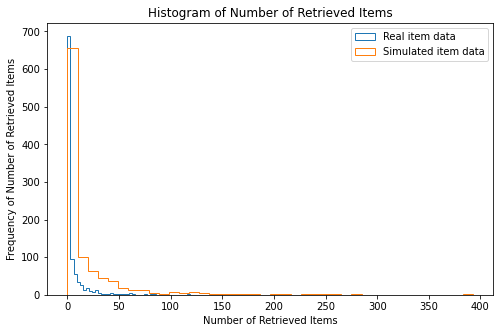

In [67]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

for data_result in results:
    plt.hist(data_result['no_of_items_'], bins=40, histtype='step')
plt.title('Histogram of Number of Retrieved Items')
plt.legend(['Real item data','Simulated item data'])
plt.xlabel('Number of Retrieved Items')
plt.ylabel('Frequency of Number of Retrieved Items')
plt.show()

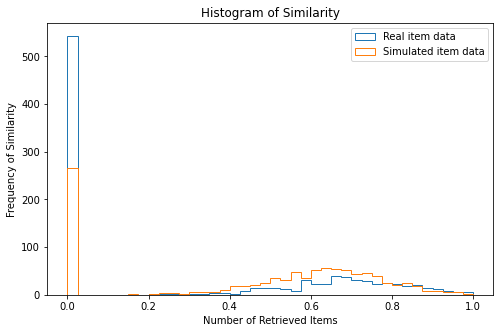

In [68]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

for data_result in results:
    plt.hist(data_result['similarity_'], bins=40, histtype='step')
plt.title('Histogram of Similarity')
plt.legend(['Real item data','Simulated item data'])
plt.xlabel('Number of Retrieved Items')
plt.ylabel('Frequency of Similarity')
plt.show()

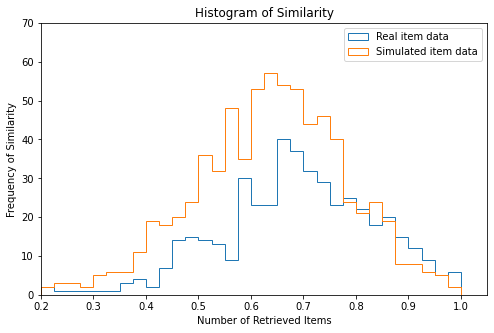

In [83]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

for data_result in results:
    plt.hist(data_result['similarity_'], bins=40, histtype='step')
plt.title('Histogram of Similarity')
plt.legend(['Real item data','Simulated item data'])
plt.xlabel('Number of Retrieved Items')
plt.ylabel('Frequency of Similarity')
plt.xlim([0.2, 1.05])
plt.ylim([0, 70])
plt.show()

In [45]:
pd.DataFrame([
    [
        (real_result.loc[real_result['no_of_items_'] < 1])['no_of_items_'].count(),
        (real_result.loc[real_result['no_of_items_'] >= 1])['no_of_items_'].count(),
    ],
    [
        (simulated_result.loc[simulated_result['no_of_items_'] < 1])['no_of_items_'].count(),
        (simulated_result.loc[simulated_result['no_of_items_'] >= 1])['no_of_items_'].count(),
    ]
], index=['real item data', 'simulated item data'], columns=['number of items < 1', 'number of items >= 1'])

,number of items < 1,number of items >= 1
real item data,543,457
simulated item data,265,735


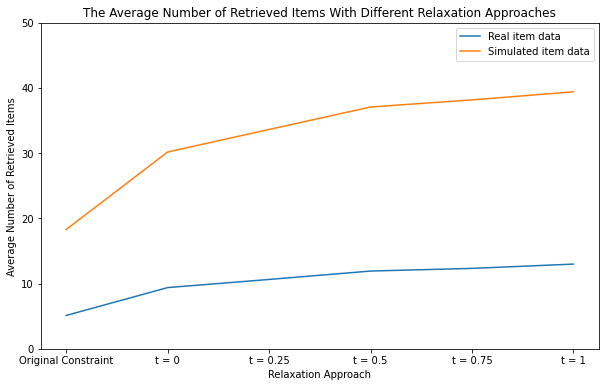

In [65]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

real_d = []
simulated_d = []
for col in no_of_items_cols:
    real_d.append(real_result[col].mean())
    simulated_d.append(simulated_result[col].mean())
plt.plot(real_d)
plt.plot(simulated_d)
plt.title('The Average Number of Retrieved Items With Different Relaxation Approaches')
plt.ylabel('Average Number of Retrieved Items')
plt.xlabel('Relaxation Approach')
plt.xticks(np.arange(0,6),relaxation_approaches)
plt.legend(['Real item data', 'Simulated item data'],loc='upper right')
plt.ylim([0, 50])
plt.show()

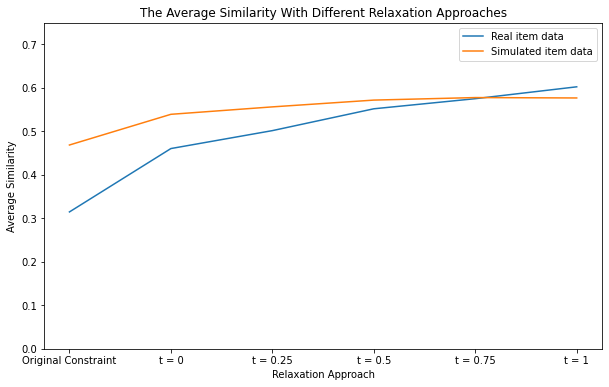

In [78]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

real_d = []
simulated_d = []
for col in similarity_cols:
    real_d.append(real_result[col].mean())
    simulated_d.append(simulated_result[col].mean())
plt.plot(real_d)
plt.plot(simulated_d)
plt.title('The Average Similarity With Different Relaxation Approaches')
plt.ylabel('Average Similarity')
plt.xlabel('Relaxation Approach')
plt.xticks(np.arange(0,6),relaxation_approaches)
plt.legend(['Real item data', 'Simulated item data'],loc='upper right')
plt.ylim([0, 0.75])
plt.show()

## 2.2 Compare Performances of constraint sets that retrieved < n and >= n items